# Generating and evaluating ML model for segmenting singledoubletriple horizontal lines

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import pandas as pd
LOGGERDEFINED = logs.openLog('still_measure_horiz_MLtrain.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# error checking

In [ ]:
for f in fh.printFolders(os.path.join(cfg.path.server, 'SDT')):
    sz = me.sizeChecker(f)

In [68]:
fstr = r'SDT\SO_S20-0.5\I_SO6-S20-0.5_S_4.00\I_SO6-S20-0.5_S_4.00_230215\disturbHoriz3_3_0.500'
folder = os.path.join(cfg.path.server, fstr)
sz = me.sizeChecker(folder, diag=2)
sz.correct(os.path.join(cfg.path.server, 'SDTML', 'newCrops'), me.fileHorizSDT)

,bn,mw,mh,uw,uh,fail
37,disturbHoriz3_3_0.500_vstill_HOh3_l0w3p4_I_SO6...,False,False,True,True,True


Exported disturbHoriz3_3_0.500_vcrop_HOh3_l0w3p4_I_SO6-S20-0.5_S_4.00_230215_184053_1.png
INFO: Copied disturbHoriz3_3_0.500_vcrop_HOh3_l0w3p4_I_SO6-S20-0.5_S_4.00_230215_184053_1.png


In [20]:
# check that images are the right size and set up ML and overwrite values if needed
folder = os.path.join(cfg.path.server, 'SDT')
cropfolder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCrops')
exp = me.sizeCheckerExporter(list(df['folder']), me.fileHorizSDT, cropfolder, mustMatch=['Horiz'], exportDiag=1)
exp.run()

INFO: Removed disturbHoriz3_1_1.250_MLsegment_HOh1_l2d1p5_I_SO11_S_4.00_230214_163313_0.png
INFO: Copied disturbHoriz3_1_1.250_vcrop_HOh1_l2d1p5_I_SO11_S_4.00_230214_163313_0.png
INFO: Removed disturbHoriz3_2_0.750_MLsegment_HOh2_l0d2o2_I_SO11_S_4.00_230214_171005_1.png
INFO: Copied disturbHoriz3_2_0.750_vcrop_HOh2_l0d2o2_I_SO11_S_4.00_230214_171005_1.png
INFO: Removed disturbHoriz3_2_1.000_MLsegment_HOh2_l3w2o7_I_SO11_S_4.00_230214_171345_9.png
INFO: Copied disturbHoriz3_2_1.000_vcrop_HOh2_l3w2o7_I_SO11_S_4.00_230214_171345_9.png
INFO: Removed disturbHoriz3_3_0.500_MLsegment_HOh3_l1w1o5_I_SO11_S_4.00_230214_180221_8.png
INFO: Copied disturbHoriz3_3_0.500_vcrop_HOh3_l1w1o5_I_SO11_S_4.00_230214_180221_8.png
INFO: Removed disturbHoriz3_3_0.750_MLsegment_HOh3_l2w3o1_I_SO11_S_4.00_230214_180917_2.png
INFO: Copied disturbHoriz3_3_0.750_vcrop_HOh3_l2w3o1_I_SO11_S_4.00_230214_180917_2.png
INFO: Removed disturbHoriz3_3_0.875_MLsegment_HOh3_l0w2p4_I_SO11_S_4.00_230214_181107_4.png
INFO: Copied 

[{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTriple\\SO_S20-0.5\\I_SO6-S20-0.5_S_4.00\\I_SO6-S20-0.5_S_4.00_230215\\disturbHoriz3_3_0.500',
  'error': cv2.error("OpenCV(4.5.4-dev) D:\\a\\opencv-python\\opencv-python\\opencv\\modules\\imgproc\\src\\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'\n")}]

# creating training and evaluation data

In [1009]:
tg = me.trainingGenerator(os.path.join(cfg.path.server, 'SDT')
                          , excludeFolders=[os.path.join(cfg.path.fig, 'singleDoubleTripleML\trainingHoriz\segmented')]
                          , mustMatch=['disturbHoriz'])

In [1153]:
fh.openExplorer(os.path.dirname(file))

In [1179]:
file = tg.randomFile(canMatch=['w1p', 'w2p', 'w3p', 'd1p', 'd2p', 'd3p'])

Exported disturbHoriz3_3_1.250_Usegment_HOh3_l0w2p2_I_SO10-S85-0.05_S_4.00_230516_141843_5.png


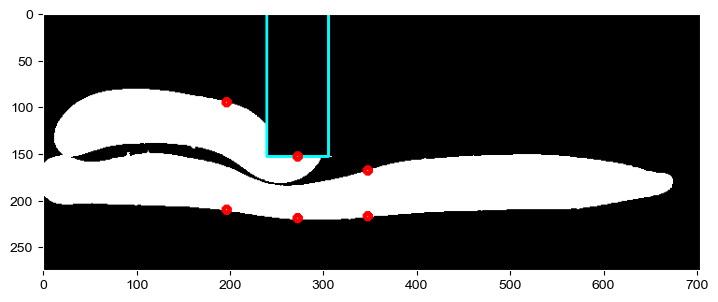

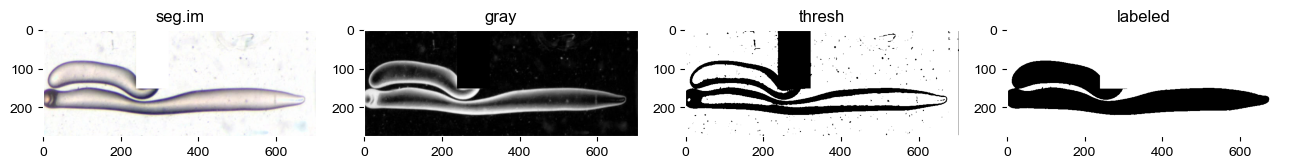

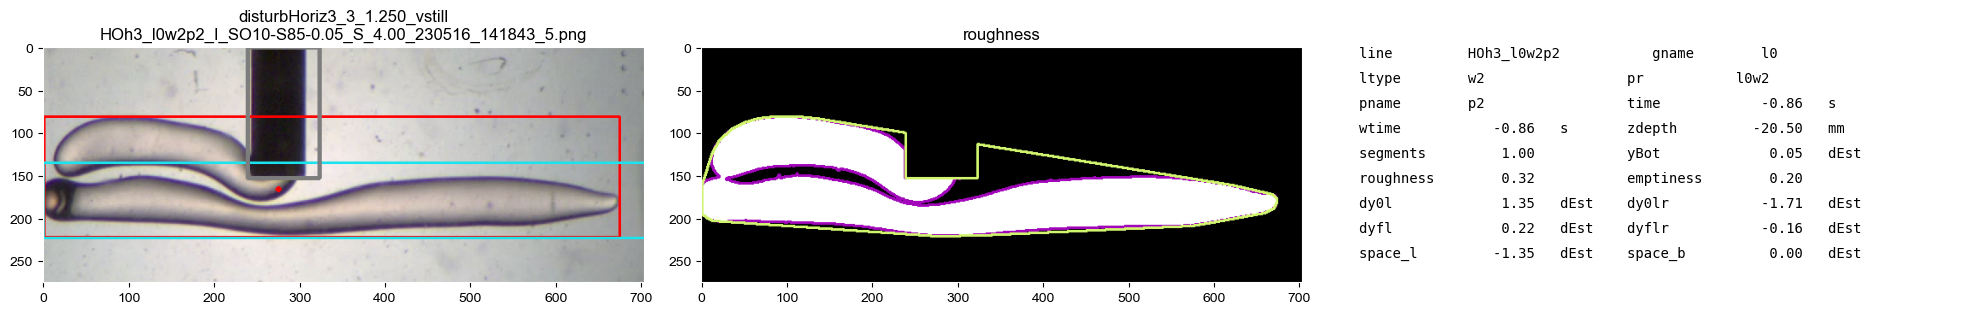

In [1180]:
vs = me.fileHorizSDT(file, diag=2, overrideSegment=True, useML=False)

In [1178]:
# add to training as is
vs.addToTraining(trainFolder=r'singleDoubleTripleML\trainingHoriz')

Exported disturbHoriz3_3_1.000_vstill_HOh3_l2w1p3_I_SO11_S_3.00_230214_130253_5.png to training data


In [1181]:
# add to training, but open paint
vs.addToTraining(trainFolder=r'singleDoubleTripleML\trainingHoriz', openPaint=True)

Exported disturbHoriz3_3_1.250_vstill_HOh3_l0w2p2_I_SO10-S85-0.05_S_4.00_230516_141843_5.png to training data


In [1167]:
# add thresh to training and open paint
vs.addToTraining(s='thresh', trainFolder=r'singleDoubleTripleML\trainingHoriz', openPaint=True)

Exported disturbHoriz3_3_0.875_vstill_HOh3_l2w2p5_I_SO9-S85-0.05_S_4.00_230512_154141_5.png to training data


In [369]:
# add ML segmentation to training and open paint
vs.addToTraining(s='MLsegment', trainFolder=r'singleDoubleTripleML\trainingHoriz', openPaint=True)

Exported disturbHoriz3_1_0.750_vstill_HOh1_l1d1o3_I_SO6-S20-0.5_S_3.00_230215_112350_4.png to training data


In [438]:
# add unsupervised segmentation to training and open paint
vs.addToTraining(s='Usegment', trainFolder=r'singleDoubleTripleML\trainingHoriz', openPaint=True)

Exported disturbHoriz3_1_0.750_vstill_HOh1_l0w1o6_I_SO6-S20-0.5_S_4.00_230215_170230_4.png to training data


In [1184]:
me.convertFilesToBW(os.path.join(cfg.path.server, r'singleDoubleTripleML\trainingHoriz\segmented'), diag=False)

# compare to manual segmentation

#### combined model

In [66]:
sc = me.segmentCompare(os.path.join(cfg.path.server, r'singleDoubleTripleML\evaluateHoriz\segmented')
                       , os.path.join(cfg.path.server, 'SDT')
                       , os.path.join(cfg.path.server, r'singleDoubleTripleML\evaluateHoriz\orig')
                        , me.fileHorizSDT)
sc.compare()
sc.export(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'segmentQualityHorizCombine.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\singleDoubleTriple\summaries\segmentQualityHorizCombine.csv


Success rate: 0.938, Average diff: 0.004
    result  difference
48   Found    2.39e-01
102  Found    3.37e-02
64   Found    3.00e-02
126  Found    2.08e-02
125  Found    1.81e-02
127  Found    1.21e-02
83   Found    1.13e-02
27   Found    9.32e-03
122  Found    7.57e-03
99   Found    7.40e-03
97   Found    6.56e-03
50   Found    6.15e-03
Red = algorithm, green = manual


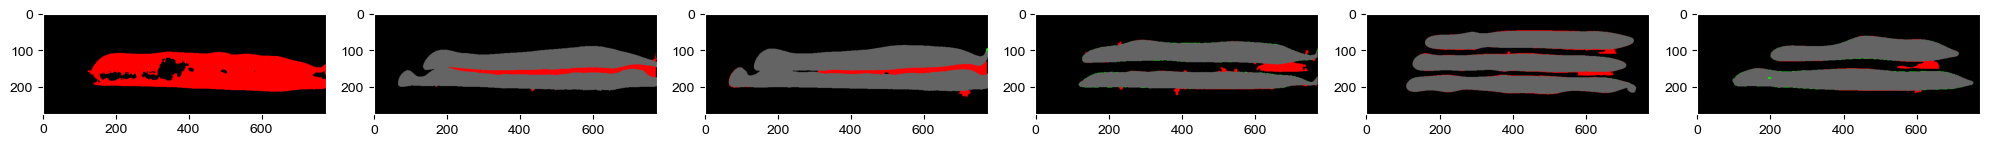

In [52]:
sc.showWorstSegmentation()

Usegment: True, MLsegment: True


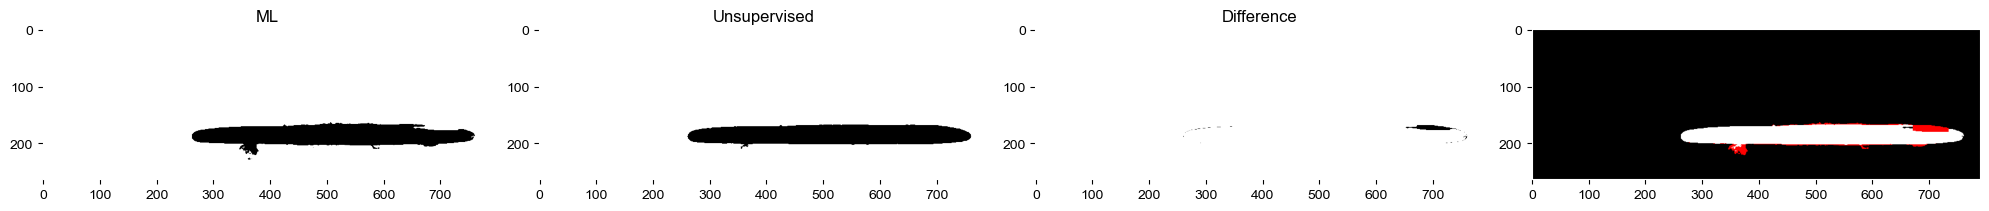

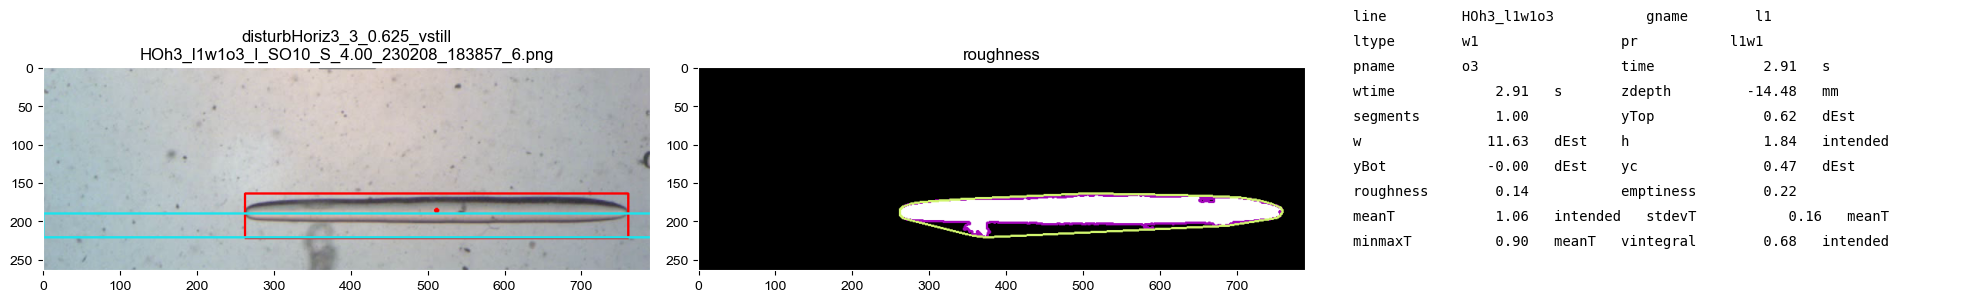

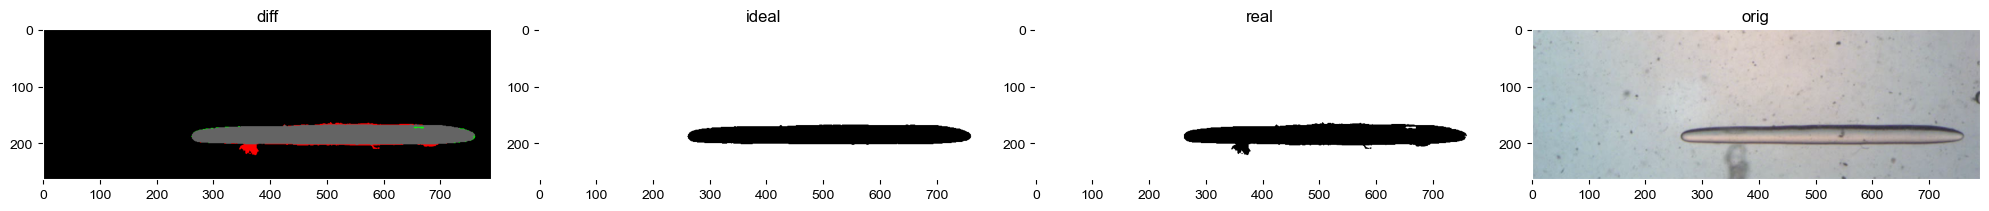

In [71]:
sc.compareFile(97, diag=2)

#### ML model

In [65]:
scm = me.segmentCompare(os.path.join(cfg.path.server, r'singleDoubleTripleML\evaluateHoriz\segmented')
                       , os.path.join(cfg.path.server, 'SDT')
                       , os.path.join(cfg.path.server, r'singleDoubleTripleML\evaluateHoriz\orig')
                        , 'ML')
scm.compare()
scm.export(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'segmentQualityHorizML.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\singleDoubleTriple\summaries\segmentQualityHorizML.csv


In [20]:
scm.compare()

Success rate: 0.829, Average diff: 0.007
    result  difference
48   Found      0.2397
50   Found      0.1211
99   Found      0.0672
18   Found      0.0524
69   Found      0.0345
32   Found      0.0330
95   Found      0.0309
125  Found      0.0267
126  Found      0.0226
64   Found      0.0206
88   Found      0.0191
39   Found      0.0188
Red = algorithm, green = manual


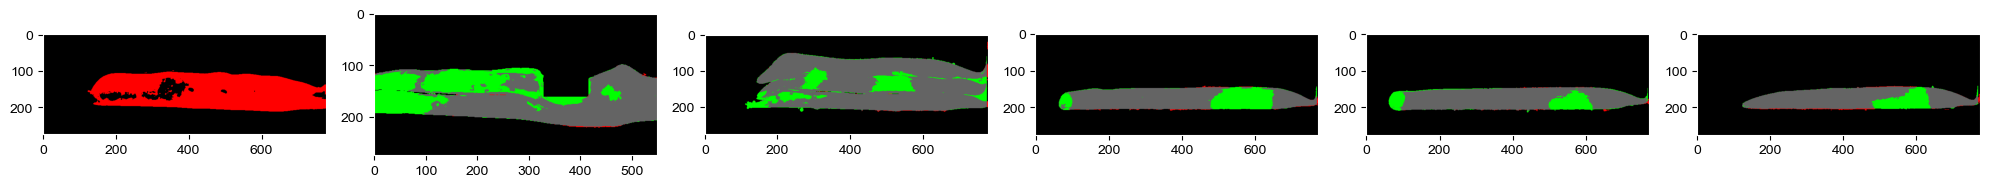

In [35]:
scm.showWorstSegmentation()

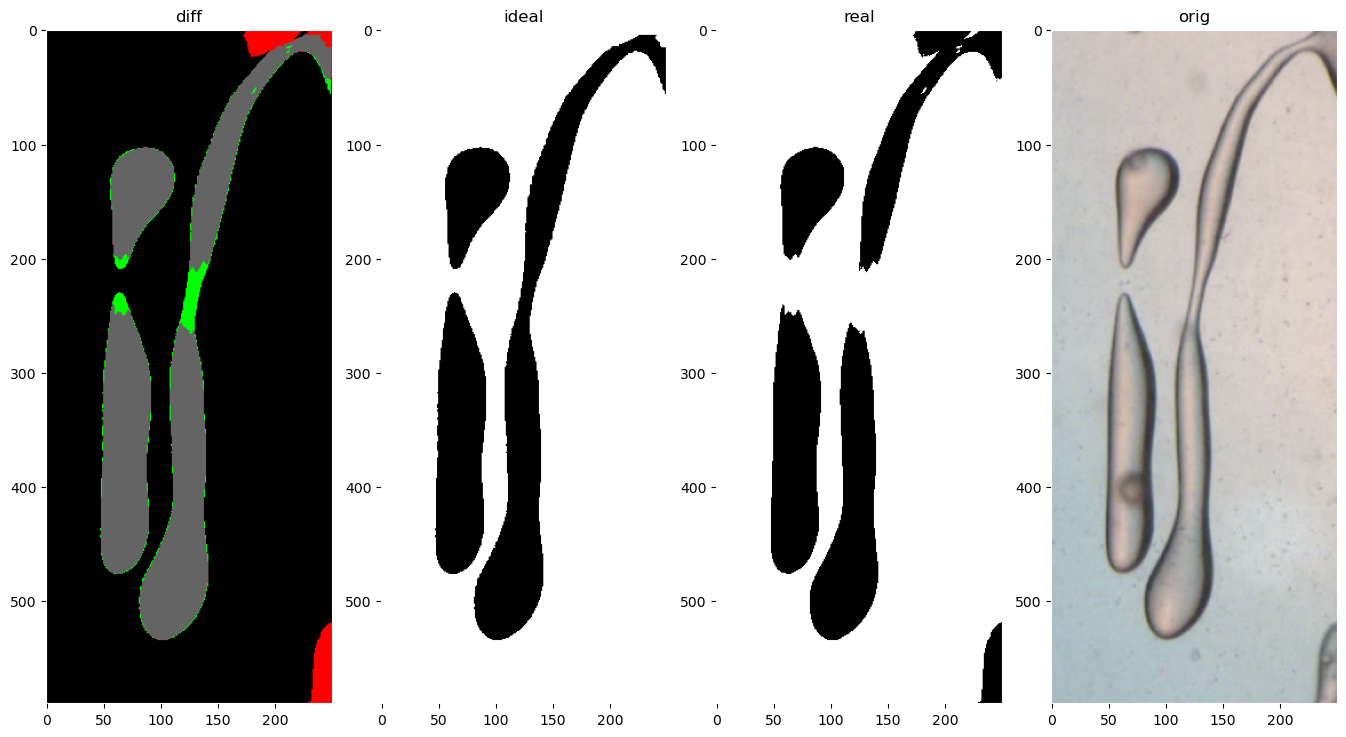

In [22]:
scm.compareFile(86, diag=2)

#### Unsupervised model

In [67]:
scu = me.segmentCompare(os.path.join(cfg.path.server, r'singleDoubleTripleML\evaluateHoriz\segmented')
                       , os.path.join(cfg.path.server, 'SDT')
                       , os.path.join(cfg.path.server, r'singleDoubleTripleML\evaluateHoriz\orig')
                        , 'U')
scu.compare()
scu.export(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'segmentQualityHorizU.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\singleDoubleTriple\summaries\segmentQualityHorizU.csv


In [20]:
scu.compare()

Success rate: 0.876, Average diff: 0.006
    result  difference
59   Found      0.1251
96   Found      0.0610
89   Found      0.0398
102  Found      0.0382
116  Found      0.0360
64   Found      0.0336
55   Found      0.0333
103  Found      0.0319
84   Found      0.0243
122  Found      0.0207
82   Found      0.0167
87   Found      0.0134
Red = algorithm, green = manual


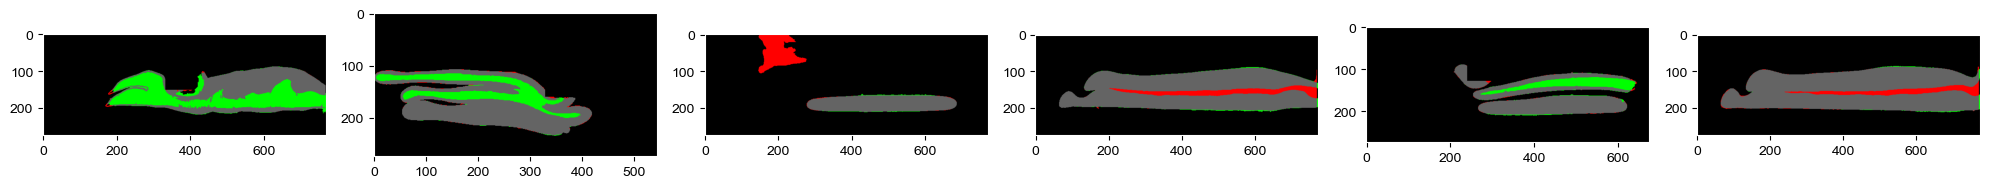

In [43]:
scu.showWorstSegmentation()

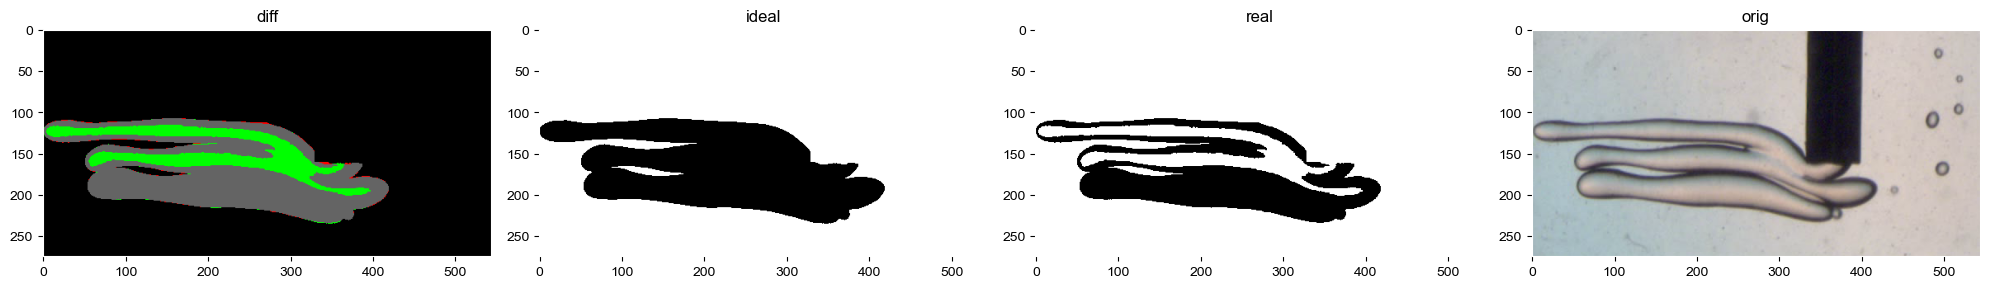

In [73]:
scu.compareFile(96, diag=2)